In [1]:
# Initial imports
from alpaca_trade_api.rest import REST, TimeFrame
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from datetime import date
load_dotenv()
import requests
import pandas as pd
import numpy as np
import getpass
import os

In [2]:
# Testing the new class created
import SMABacktester as SMA

## Rest API
Note the difference in API call instantiation is the param raw_data. The difference is if we return an api response raw or wrap it with the Entity objects.
* api_account - raw_data is set to True to return the actual dictionary for the account data
* api_trade   - raw_data is set to False to return the entity object

In [3]:
# API Info for fetching data, portfolio, etc. from Alpaca
BASE_URL = "https://paper-api.alpaca.markets"

if os.getenv("APCA_API_KEY_ID") is not None:
    ALPACA_API_KEY = os.getenv("APCA_API_KEY_ID")
else:

    ALPACA_API_KEY = getpass.getpass('Type your alpaca api key here, it is safe from viewing.')

if os.getenv("ALPACA_SECRET_KEY") is not None:
    ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
else:

    ALPACA_SECRET_KEY = getpass.getpass('Type your secret alpaca api key here, it is safe from viewing.')

# Instantiate REST API Connection - Account
api_account = tradeapi.REST(key_id=ALPACA_API_KEY, secret_key=ALPACA_SECRET_KEY, raw_data=True,base_url=BASE_URL, api_version='v2')

# Instantiate REST API Connection - Trade
api_trade = tradeapi.REST(key_id=ALPACA_API_KEY, secret_key=ALPACA_SECRET_KEY, raw_data=False, base_url=BASE_URL, api_version='v2')

In [4]:
# Choose a symbol
symbol = 'BTCUSD'

In [5]:
# choose your short term and long term SMA Windows
SMA_S = 50
SMA_L = 200

In [6]:
# Get the start date and end dates
start = "2009-01-03" # Bitcoin's genesis block date
end = "2022-03-16"
# end = date.today().strftime("%Y/%m/%d") # gets todays date automatically

In [7]:
# load the ticker, short moving avg (50 days) long moving average (200 days), start date, and end date, and the api to pass
tester = SMA.SMABacktester(symbol, SMA_S, SMA_L, start, end, api_trade)

In [8]:
# See if def __repr__(self) works
tester

SMABacktester(symbol = BTCUSD, SMA_S = 50, SMA_L = 200, start = 2009-01-03, end = 2022-03-16, api = <alpaca_trade_api.rest.REST object at 0x0000022D5F183C48>)

In [9]:
# Test Strategy
tester.test_strategy()

(129.337963, -12.451641)

In [10]:
# View the dataframe
tester.results

close   returns       SMA_S        SMA_L  \
timestamp                                                                
2015-07-30 05:00:00+00:00    288.05 -0.007161    266.1442    247.87005   
2015-07-31 05:00:00+00:00    283.60 -0.015569    267.2282    247.84310   
2015-08-01 05:00:00+00:00    278.65 -0.017608    268.1986    247.93635   
2015-08-02 05:00:00+00:00    281.00  0.008398    269.1492    248.24320   
2015-08-03 05:00:00+00:00    283.77  0.009809    270.1150    249.06205   
...                             ...       ...         ...          ...   
2022-03-15 05:00:00+00:00  39162.30  0.000817  39969.2666  40149.71955   
2022-03-15 05:00:00+00:00  39140.00 -0.000570  39995.1502  40136.56705   
2022-03-16 05:00:00+00:00  41076.91  0.048301  40058.4884  40132.91110   
2022-03-16 05:00:00+00:00  41331.00  0.006167  40128.7884  40130.83110   
2022-03-16 05:00:00+00:00  41136.00 -0.004729  40087.0342  40126.35955   

                           position  strategy    creturns   cstrategy  
timestamp                                                              
2015-07-30 05:00:00+00:00         1 -0.007161    0.992865    0.992865  
2015-07-31 05:00:00+00:00         1 -0.015569    0.977527    0.977527  
2015-08-01 05:00:00+00:00         1 -0.017608    0.960465    0.960465  
2015-08-02 05:00:00+00:00         1  0.008398    0.968565    0.968565  
2015-08-03 05:00:00+00:00         1  0.009809    0.978113    0.978113  
...                             ...       ...         ...         ...  
2022-03-15 05:00:00+00:00        -1 -0.000817  134.986557  135.856333  
2022-03-15 05:00:00+00:00        -1  0.000570  134.909693  135.933737  
2022-03-16 05:00:00+00:00        -1 -0.048301  141.585930  129.524019  
2022-03-16 05:00:00+00:00        -1 -0.006167  142.461740  128.727746  
2022-03-16 05:00:00+00:00        -1  0.004729  141.789604  129.337963  

[3285 rows x 8 columns]

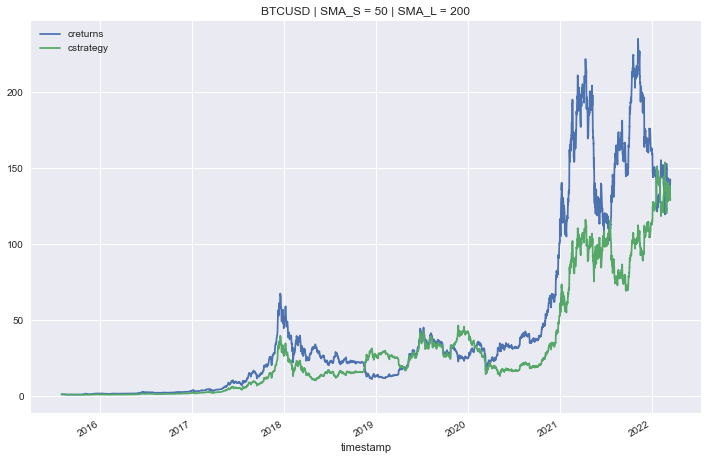

In [11]:
# Test the plot results function
# This is going to plot the cumulative returns of the buy and hold strategy (BLUE)
# vs. the SMA strategy's cumulative return (GREEN)
tester.plot_results()  # These returns are horrible

In [12]:
# Test setting new parameters setting a new short term and long term window
tester.set_parameters(22, 100)
tester.test_strategy()

(38.118702, -143.794357)

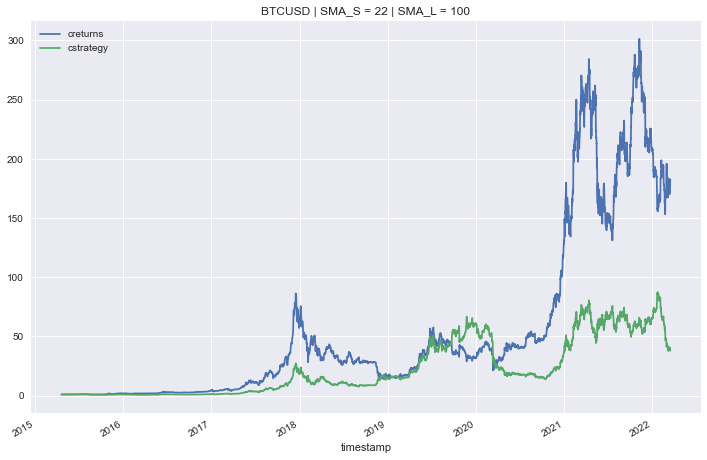

In [13]:
# Plot again
tester.plot_results() # This is even worse

In [14]:
# Optimize the function with Brute force! We dontwant to try one by one manually
# Latency is due to brute force algorithm going, give it time.
# through every iteration and returning the maximized result (set with negative in function)
train = tester # use the same function to optimize
train.optimize_parameters((25, 50, 1), (100, 200, 1)) # optimizing strategy & backtesting ("in-sample")

(array([ 42., 118.]), 495.689801)

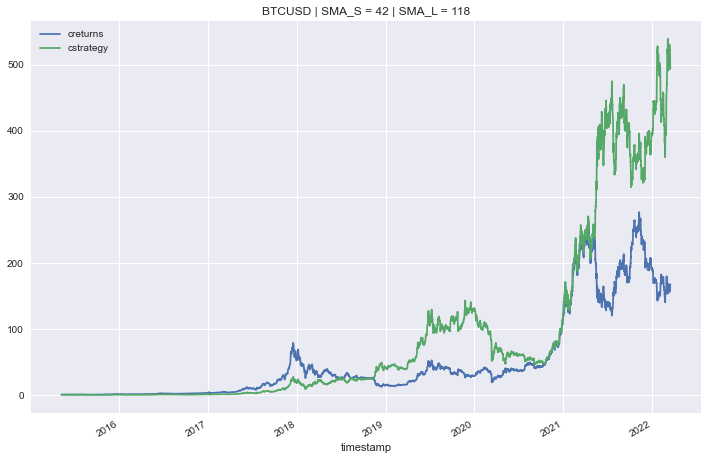

In [15]:
train.plot_results() # NYCEEEE GAINS >:D